In [1]:
import cStringIO
from PIL import Image
from sklearn.base import BaseEstimator, TransformerMixin

IMAGE_SHAPE = 128, 128
IMAGE_ARRAY_SIZE = IMAGE_SHAPE[0] * IMAGE_SHAPE[1]

def ela_from_image(file_path, quality=95):
    source_image = Image.open(file_path)
    string_io = cStringIO.StringIO()
    source_image = source_image.resize(IMAGE_SIZE)
    source_image.save(string_io, 'JPEG', quality=quality)
    output_image_io = Image.open(string_io)
    output_image = Image.new('RGB', source_image.size)
    output_image.putdata(map(generator.calculate,
                             source_image.getdata(),
                             output_image_io.getdata()))
    output_image = output_image.convert('L')
    return np.r_[output_image].reshape(-1)

class ELAGenerator():
    def __init__(self, trigger=10, enhance=20, coloronly=False):
        self.trigger = trigger
        self.enhance = enhance
        self.coloronly = coloronly

    def calculate(self, pixelA, pixelB):
        pixelDiff = map(lambda x, y: abs(x - y), pixelA, pixelB)
        if sum(pixelDiff) > self.trigger and (not self.coloronly or pixelDiff[0] != pixelDiff[1] or pixelDiff[0] != pixelDiff[2]):
            return tuple([x * self.enhance for x in pixelDiff])
        else:
            return 0, 0, 0



generator = ELAGenerator(trigger=1, enhance=50)

In [2]:
from imread import imread
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from sklearn import cross_validation
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

IMAGE_SHAPE = 128, 128
IMAGE_ARRAY_SIZE = IMAGE_SHAPE[0] * IMAGE_SHAPE[1]

def read_image(path):
    file = imread(path, as_grey=True)
    file = scipy.misc.imresize(file, IMAGE_SHAPE). \
                      reshape(IMAGE_ARRAY_SIZE)
    return file

def image_files_in_folder(folder):
    all_files = os.listdir(folder)
    return [file for file in all_files if file.endswith('.jpg')]

def load_images(folder, n_files=None):
    image_files = image_files_in_folder(folder)
    if n_files:
        image_files = np.random.choice(image_files_in_folder(folder), n_files)
    images = np.empty((len(image_files), IMAGE_ARRAY_SIZE),
                      dtype=np.float32)
    for i, file_name in enumerate(image_files):
        try:
            images[i] = read_image('/'.join([folder, file_name]))
        except RuntimeError:
            print(i, file_name)
        print(i, images[i].min(), images[i].max())
    return images

def plot_roc_curve(model, X, y):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, model.predict(X))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,
             true_positive_rate,
             'blue',
             label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print(model.score(X, y))
    print(false_positive_rate, true_positive_rate)

In [149]:
X.save

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [3]:
np.random.seed(0)
psed_images = load_images('../data/psed-by-email-ela')
nonpsed_images = load_images('../data/non-psed-ela')
X = np.concatenate((psed_images,
                    nonpsed_images))
y = np.concatenate((np.repeat(1, len(psed_images)),
                    np.repeat(0, len(nonpsed_images))))

X_train, X_test, y_train, y_test = \
    cross_validation.train_test_split(X, y, random_state=0, train_size=.8)

standardizer = StandardScaler()
X_train_std = standardizer.fit_transform(X_train)
X_test_std = standardizer.fit_transform(X_test)

(0, 0.0, 188.0)
(1, 34.0, 205.0)
(2, 0.0, 125.0)
(3, 0.0, 68.0)
(4, 0.0, 75.0)
(5, 23.0, 144.0)
(6, 6.0, 136.0)
(7, 0.0, 62.0)
(8, 0.0, 93.0)
(9, 0.0, 94.0)
(10, 0.0, 177.0)
(11, 11.0, 178.0)
(12, 0.0, 147.0)
(13, 0.0, 92.0)
(14, 0.0, 123.0)
(15, 0.0, 169.0)
(16, 7.0, 87.0)
(17, 0.0, 165.0)
(18, 0.0, 81.0)
(19, 62.0, 177.0)
(20, 7.0, 190.0)
(21, 0.0, 130.0)
(22, 0.0, 149.0)
(23, 0.0, 172.0)
(24, 0.0, 99.0)
(25, 0.0, 124.0)
(26, 0.0, 136.0)
(27, 0.0, 183.0)
(28, 0.0, 146.0)
(29, 0.0, 119.0)
(30, 0.0, 131.0)
(31, 2.0, 134.0)
(32, 0.0, 237.0)
(33, 0.0, 123.0)
(34, 0.0, 116.0)
(35, 7.0, 151.0)
(36, 0.0, 127.0)
(37, 0.0, 83.0)
(38, 0.0, 202.0)
(39, 6.0, 99.0)
(40, 0.0, 101.0)
(41, 0.0, 117.0)
(42, 27.0, 55.0)
(43, 5.0, 74.0)
(44, 0.0, 153.0)
(45, 19.0, 70.0)
(46, 0.0, 177.0)
(47, 0.0, 196.0)
(48, 0.0, 97.0)
(49, 0.0, 205.0)
(50, 0.0, 205.0)
(51, 0.0, 185.0)
(52, 0.0, 93.0)
(53, 0.0, 179.0)
(54, 0.0, 169.0)
(55, 0.0, 73.0)
(56, 0.0, 128.0)
(57, 0.0, 139.0)
(58, 0.0, 190.0)
(59, 0.0, 91.0)
(6

In [46]:
class ELATransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        ela_X = np.empty((len(X), IMAGE_ARRAY_SIZE))
        for index, file_name in enumerate(X):
            print(index)
            ela_X[index] = ela_from_image(file_name)
        return ela_X

## Random Forest

In [148]:
hyperparameters = [{
        'criterion': ['entropy', 'gini'],
        'max_features': [None, 'auto', 'sqrt', 'log2'],
        'n_estimators': [3, 5, 10, 20, 30, 100, 500],
}]
grid_random_forest = \
    GridSearchCV(RandomForestClassifier(random_state=0),
                 param_grid=hyperparameters,
                 n_jobs=8)
grid_random_forest.fit(X_train, y_train)
# grid_random_forest = grid_random_forest.best_estimator_
# print(grid_random_forest)
# grid_random_forest.score(X_test, y_test)

KeyboardInterrupt: 

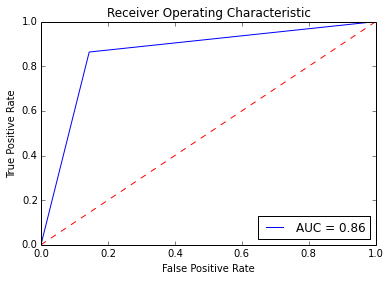

0.859296482412
(array([ 0.        ,  0.14414414,  1.        ]), array([ 0.        ,  0.86363636,  1.        ]))


In [76]:
grid_random_forest = \
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=8,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
grid_random_forest.fit(X_train, y_train)
plot_roc_curve(grid_random_forest, X_test, y_test)

## SVC

In [61]:
hyperparameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
grid_svc = GridSearchCV(SVC(random_state=0),
                        param_grid=hyperparameters,
                        verbose=True)
grid_svc.fit(X_train, y_train)
grid_svc = grid_svc.best_estimator_
print(grid_svc)
grid_svc.score(X_test, y_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  3.7min finished


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


0.82412060301507539

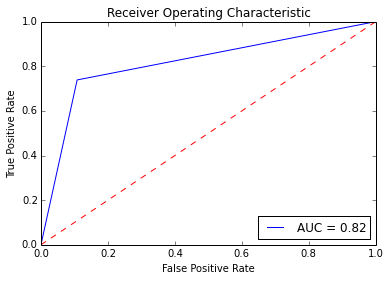

0.824120603015
(array([ 0.        ,  0.10810811,  1.        ]), array([ 0.        ,  0.73863636,  1.        ]))


In [62]:
grid_svc = \
    SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=0, shrinking=True,
      tol=0.001, verbose=False)
grid_svc.fit(X_train, y_train)
plot_roc_curve(grid_svc, X_test, y_test)

## Stochastic Gradient Descent

In [136]:
hyperparameters = [{
        'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'penalty': ['none', 'l2', 'l1', 'elasticnet'],
}]
grid_sgd = GridSearchCV(SGDClassifier(n_jobs=-1, random_state=0),
                        param_grid=hyperparameters,
                        verbose=True)
grid_sgd.fit(X_train, y_train)
grid_sgd = grid_sgd.best_estimator_
print(grid_sgd)
grid_sgd.score(X_test, y_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   11.9s


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   28.2s finished


0.44221105527638194

In [134]:
hyperparameters = [{
        'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'penalty': ['none', 'l2', 'l1', 'elasticnet'],
}]
grid_sgd = GridSearchCV(SGDClassifier(n_jobs=-1, random_state=0),
                        param_grid=hyperparameters,
                        verbose=True)
grid_sgd.fit(X_train_std, y_train)
grid_sgd = grid_sgd.best_estimator_
print(grid_sgd)
grid_sgd.score(X_test_std, y_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   11.3s


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_hinge', n_iter=5, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   27.4s finished


0.82412060301507539

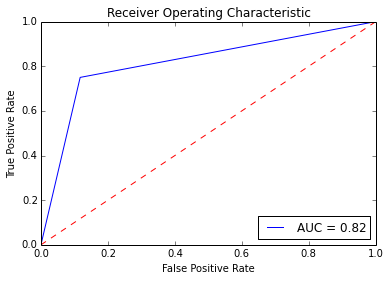

0.824120603015
(array([ 0.        ,  0.11711712,  1.        ]), array([ 0.  ,  0.75,  1.  ]))


In [137]:
grid_sgd = \
    SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_hinge', n_iter=5, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)
grid_sgd.fit(X_train_std, y_train)
plot_roc_curve(grid_sgd, X_test_std, y_test)

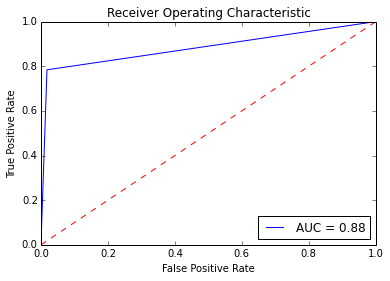

0.894472361809
(array([ 0.        ,  0.01801802,  1.        ]), array([ 0.        ,  0.78409091,  1.        ]))


In [132]:
grid_sgd = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)
grid_sgd.fit(X_train_std, y_train)
plot_roc_curve(grid_sgd, X_test_std, y_test)

## Nearest Centroid Classifier

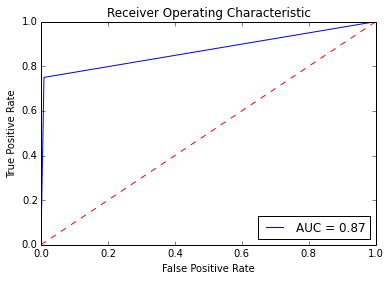

0.884422110553
(array([ 0.        ,  0.00900901,  1.        ]), array([ 0.  ,  0.75,  1.  ]))


In [74]:
ncc = NearestCentroid()
ncc.fit(X_train, y_train)
plot_roc_curve(ncc, X_test, y_test)

## AdaBoost

In [33]:
hyperparameters = [{
        'learning_rate': [.01, .1, .5, 1, 10],
        'n_estimators': [10, 50, 100],
}]
grid_adaboost = GridSearchCV(AdaBoostClassifier(random_state=0),
                             param_grid=hyperparameters,
                             verbose=True)
grid_adaboost.fit(X_train, y_train)
grid_adaboost = grid_adaboost.best_estimator_
print(grid_adaboost)
grid_adaboost.score(X_test, y_test)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 14.5min finished


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=0)


0.87939698492462315

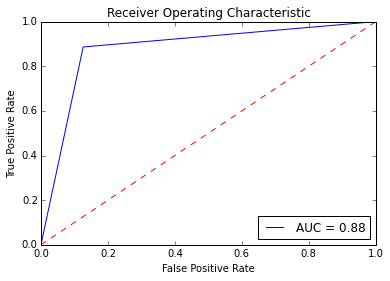

0.879396984925
(array([ 0.        ,  0.12612613,  1.        ]), array([ 0.        ,  0.88636364,  1.        ]))


In [58]:
grid_adaboost = \
    AdaBoostClassifier(algorithm='SAMME.R',
                       base_estimator=None,
                       learning_rate=0.5,
                       n_estimators=50,
                       random_state=0)
grid_adaboost.fit(X_train, y_train)
plot_roc_curve(grid_adaboost, X_test, y_test)

## Logistic Regression

In [52]:
hyperparameters = [{
        'penalty': ['l1', 'l2'],
        'C': [.01, .1, 1, 10],
}]
grid_lr = GridSearchCV(LogisticRegression(n_jobs=-1, random_state=0),
                       param_grid=hyperparameters,
                       verbose=True)
grid_lr.fit(X_train_std, y_train)
grid_lr = grid_lr.best_estimator_
print(grid_lr)
grid_lr.score(X_test_std, y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   41.0s finished


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


0.87939698492462315

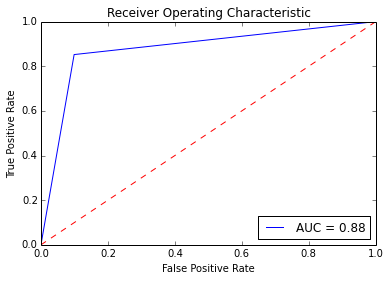

0.879396984925
(array([ 0.       ,  0.0990991,  1.       ]), array([ 0.        ,  0.85227273,  1.        ]))


In [71]:
grid_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
grid_lr.fit(X_train_std, y_train)
plot_roc_curve(grid_lr, X_test_std, y_test)

## LinearDiscriminantAnalysis

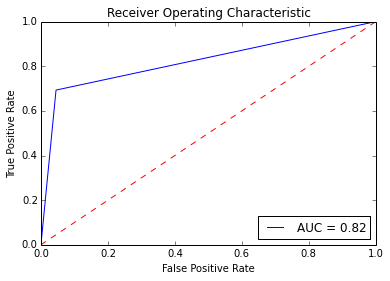

0.839195979899
(array([ 0.        ,  0.04504505,  1.        ]), array([ 0.        ,  0.69318182,  1.        ]))


In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
plot_roc_curve(lda, X_test, y_test)

## Testing

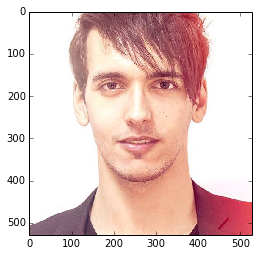

In [88]:
from matplotlib import pyplot as plt

image = imread('/Users/irio/Desktop/bruno_original.jpg')
plt.imshow(image, interpolation='nearest')
plt.show()

In [128]:
paths = [
    '/Users/irio/Desktop/bruno.jpg',
    '/Users/irio/Desktop/IMG_2515.jpg',
]
test2 = list(map(read_image, paths))
test2_std = standardizer.fit_transform(test2)

models = [grid_random_forest, grid_svc, ncc, grid_adaboost, lda]
linear_models = [grid_lr, grid_sgd]
print(map(lambda model: model.predict(test2)[0], models))
print(map(lambda model: model.predict(test2_std)[0], linear_models))

[0, 0, 0, 0, 0]
[1, 0]


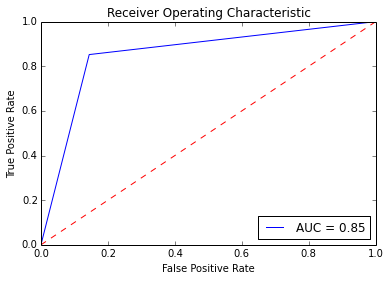

0.854271356784
(array([ 0.        ,  0.14414414,  1.        ]), array([ 0.        ,  0.85227273,  1.        ]))


In [141]:
from sklearn.ensemble import VotingClassifier

pipeline = [
    ('random_forest', grid_random_forest),
#     ('ncc', ncc),
#     ('lda', lda),
#     ('grid_adaboost', grid_adaboost),
#     ('logistic_regression', grid_lr),
    ('sgd', grid_sgd),
]
# voting_ensemble = VotingClassifier(pipeline, voting='soft')
voting_ensemble = VotingClassifier(pipeline, voting='hard')
voting_ensemble.fit(X_train, y_train)
plot_roc_curve(voting_ensemble, X_test, y_test)

In [144]:
print(voting_ensemble.predict(test2))
# voting_ensemble.predict_proba(test2)

[0 0]
